# Importing the libraries

In [ ]:
import numpy as np 
import pandas as pd 

# Reading the dataset

In [ ]:
data=pd.read_csv('/content/urldata.csv')
data.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,1,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,1,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,0,0,1,1,1,1,1,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,1,1,1,0


# Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
X = data.copy()

y = X.pop('Label')

X = data.drop(columns=['Label', 'Domain'])

X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

input_shape = [X_train.shape[1]]
print("Input shape is ", input_shape)
X.head()

Input shape is  [16]


,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards
0,0,0,1,1,0,0,0,0,0,1,1,1,0,1,1,0
1,0,0,1,1,1,0,0,0,0,1,1,1,0,1,1,0
2,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0
3,0,0,1,3,0,0,0,0,0,0,0,1,1,1,1,1
4,0,0,1,3,0,0,0,0,0,1,0,1,0,1,1,1


# Adding the layers of GRU in the sequential model

In [ ]:
# from tensorflow import keras
# from tensorflow.keras import layers
import tensorflow as tf
import os 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# model = keras.Sequential([
#     layers.BatchNormalization(input_shape=input_shape),
#     layers.Dense(512, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dropout(0.3),
#     layers.Dense(512, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dropout(0.3),
#     layers.Dense(1, activation='sigmoid'),
# ])

model = Sequential()
model.add(GRU(64, input_shape=(X_train.shape[1], 1), activation='tanh', recurrent_dropout=0.2, return_sequences=True))
model.add(GRU(32, activation='tanh', recurrent_dropout=0.2))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Adding tensorflow pugins

In [ ]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow_addons as tfa

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy',
             tf.metrics.Precision(),
             tf.metrics.Recall(), ],
    
)

# Training and Fitting the GRU Model

In [ ]:
# early_stopping = keras.callbacks.EarlyStopping(
#     patience=20,
#     min_delta=0.01,
#     restore_best_weights=True,
# )
x_train = np.array([np.array(val) for val in X_train])
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=500,
    #callbacks=[early_stopping],
)

Epoch 1/500
3/3 [==============================] - 6s 625ms/step - loss: 0.6960 - binary_accuracy: 0.4938 - precision_1: 0.4774 - recall_1: 0.1393 - val_loss: 0.6932 - val_binary_accuracy: 0.5011 - val_precision_1: 0.5011 - val_recall_1: 1.0000
Epoch 2/500
3/3 [==============================] - 1s 241ms/step - loss: 0.6937 - binary_accuracy: 0.4886 - precision_1: 0.4933 - recall_1: 0.8651 - val_loss: 0.6924 - val_binary_accuracy: 0.5011 - val_precision_1: 0.5011 - val_recall_1: 1.0000
Epoch 3/500
3/3 [==============================] - 1s 241ms/step - loss: 0.6923 - binary_accuracy: 0.4996 - precision_1: 0.4996 - recall_1: 0.9868 - val_loss: 0.6912 - val_binary_accuracy: 0.5011 - val_precision_1: 0.5011 - val_recall_1: 1.0000
Epoch 4/500
3/3 [==============================] - 1s 261ms/step - loss: 0.6925 - binary_accuracy: 0.4967 - precision_1: 0.4981 - recall_1: 0.9663 - val_loss: 0.6898 - val_binary_accuracy: 0.5011 - val_precision_1: 0.5011 - val_recall_1: 1.0000
Epoch 5/500
3/3 [===

# Graph comparisions of different paramters

Best Validation Loss: 0.21055752038955688
Best Validation Accuracy: 0.9252747297286987
Best Recall: 1.0
Best Precision: 1.0


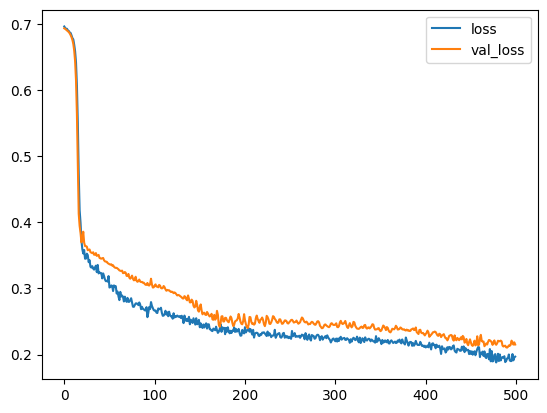

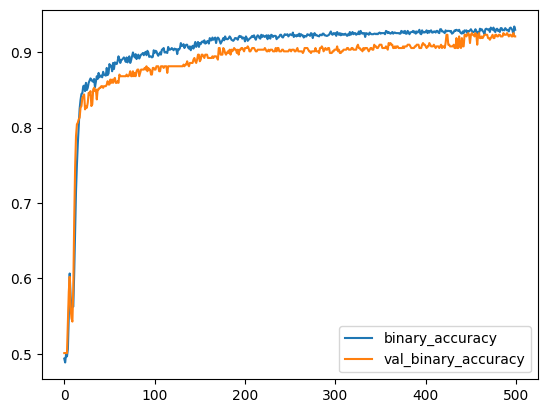

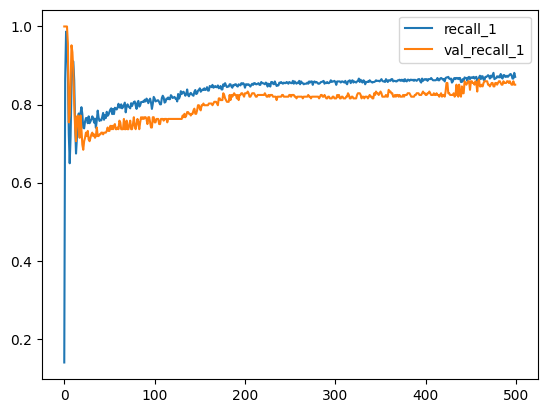

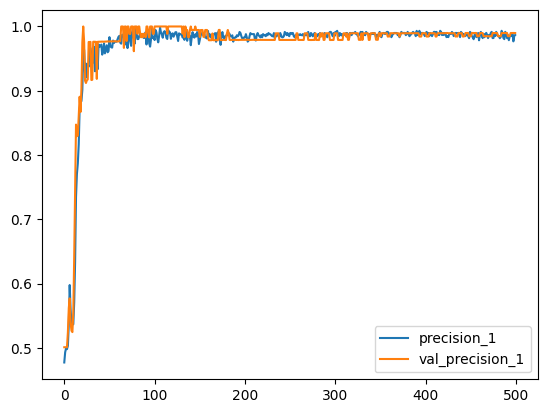

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot()
history_df.loc[0:, ['recall_1', 'val_recall_1']].plot()
history_df.loc[0:, ['precision_1', 'val_precision_1']].plot()

print(f"Best Validation Loss: {history_df['val_loss'].min()}" +\
      f"\nBest Validation Accuracy: {history_df['val_binary_accuracy'].max()}"+\
      f"\nBest Recall: {history_df['val_recall_1'].max()}" +\
      f"\nBest Precision: {history_df['val_precision_1'].max()}"
)

#Confusion Matrix

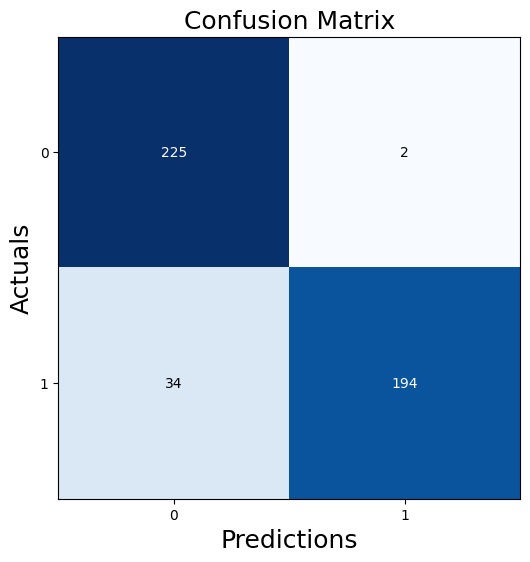

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat= confusion_matrix(y_valid,predicted.round()), figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#Classification Report

In [ ]:
print(classification_report(y_valid, predicted.round()))#, ['0', '1']))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       227
           1       0.99      0.85      0.92       228

    accuracy                           0.92       455
   macro avg       0.93      0.92      0.92       455
weighted avg       0.93      0.92      0.92       455



In [ ]:
tp=255
fp=2
fn=24
tn=204
acc=(tp+tn)/(tp+tn+fp+fn)
prec=tp/(tp+fp)
rec=tp/(tp+fn)
f1= 2*(prec*rec/(prec+rec))
print(f"ACCURACY= {acc*100}")
print(f"PRECISION= {prec*100}")
print(f"RECALL= {rec*100}")
print(f"f1= {f1*100}")

ACCURACY= 94.63917525773195
PRECISION= 99.22178988326849
RECALL= 91.39784946236558
f1= 95.14925373134328


# Printing all the required performance metrics

In [ ]:
from sklearn import metrics
print(f"Accuracy of the model is : {metrics.accuracy_score(y_valid, predicted.round())}")
print(f"Precision of the model is : {metrics.precision_score(y_valid, predicted.round())}")
print(f"Recall of the model is : {metrics.recall_score(y_valid, predicted.round())}")
print(f"F1 Score of the model is : {metrics.f1_score(y_valid, predicted.round())}")

Accuracy of the model is : 0.9208791208791208
Precision of the model is : 0.9897959183673469
Recall of the model is : 0.8508771929824561
F1 Score of the model is : 0.9150943396226416
